# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Sam Cuthbertson

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday September 15th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

An owner of a taxi company wants to estimate his fleet's average fuel economy over the next year in order to estimate the company's future fuel costs.  His fleet of taxis is made up of 100 Crown Victorias, 50 Toyota Priuses, and 50 Ford Escapes.  The owner randomly selects 12 vehicles from his vehicle registration rolls and tracks their fuel usage in miles per gallon over the next week.  So as to get a proper estimate, he intentionally selects 6 Crown Vics, 3 Priuses, and 3 Escapes to track. 

Identify the following: 

- ** Population: The Fleet ** 
- ** Sample Frame: Vehicle Registration Rolls **
- ** Sample: The 12 vehicles chosen ** 
- ** Sample Type: Simple Random **
- ** QOI: Fuel Usage (mpg) **

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
3.0 \quad 
3.2 \quad
4.2 \quad
5.0
$$

with sample mean $4$ and sample median $4.2$. 

**Part A**: We replace the element $3.2$ by some real number $y$. What happens with the sample mean and the sample median of this new dataset as $y \rightarrow \infty$?


** The mean will approach infinity as well, as it depends on the value of all items in the set. The median will be y until y > 4.2, and then will remain at 4.2 as we aren't adding items to the set, merely modifying one of the values. **

**Part B**: We replace a number of elements by some real number $y$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $y \rightarrow \infty$?

** At least three, since we need the median to be y, and to do that we must replace at least n/2 elements. **

**Part C**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $y$, so that the sample mean of the new dataset goes to infinity as $y \rightarrow \infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to infinity? 

**To make the sample mean approach infinity, we only need to replace one element. To make the sample median approach infinity, we need to replace (n/2) elements. In a set with an even number of elements, this will work through forcing the median to be y. In a set with an odd number of elements, the median will then be an average of two elements, where one element is y. That will make the median approach infinity in the same fashion that replacing one item in a set will make the mean approach infinity. **

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

\begin{align}
\frac{1}{n}\sum_{k=1}^n x_k &= \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \\
    &= \frac{1}{n-1}\sum_{k=1}^{n-1} x_k + \frac{x_n - \frac{1}{n-1}\sum_{k=1}^{n-1} x_k }{n} \\
    &= \frac{1}{n-1}\sum_{k=1}^{n-1} x_k + \frac{x_n}{n} - \frac{1}{n(n-1)} \sum_{k=1}^{n-1} x_k \\
\end{align}

**Part B (Extra Credit)**: Show algebraically that the following relation holds between the variance of the first $n-1$ observations and the variance of all $n$ observations: 

$$
s^2_n = \frac{(n-2)}{(n-1)}s^2_{n-1} + \frac{(x_n - \bar{x}_{n-1})^2}{n}
$$

**Part C**: It turns out that in some scenarios the variance calculation in **Part B** can suffer from numerical instability (that is, due to round-off errors and finite precision arithmetic, the algorithm can return garbage).  A better method is to update the sum of squares term incrementally and then divide by $n-1$ at the end.  Define the sum of squares with $n$ observations as $
M_n = \sum_{k=1}^n (x_k - \bar{x}_n)^2$. We can then compute the sample variance as $s_n^2 = M_n/(n-1)$.

Show algebraically that the following relation holds between the sum of squares with $n-1$ observations and the sum of squares with all $n$ observations: 

$$
M_n = M_{n-1} + (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n)
$$

**Informative But Not Required**: Write a Python function that implements the online variance computation in **Part C** and  requires only one pass over the data. 

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in titanic_data.csv and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [2]:
dfTiDirt = pd.read_csv('titanic_data.csv')

**Part A**: Explain in words what patterns you might see in the data if there were male chivalry in the final hours aboard the Titanic?  What patterns might you see if there were class warfare in the final hours?

** If there was male chivalry, we should see much lower survival rates in males compared to the survival rates of females. **

** If there was class warfare, we should see much higher survival rates in certain classes compared to other classes. **

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [3]:
dfTitanic = dfTiDirt.dropna(subset=["Survived", "Pclass", "Age", "Sex"]).copy()

**Part C**: Determine the fraction of survivors from each passenger class. 

In [4]:
firstClassRate = (dfTitanic.loc[(dfTiDirt["Survived"] == 1) & (dfTitanic["Pclass"] == 1), ["Survived"]].count() / dfTitanic.loc[dfTitanic["Pclass"] == 1, ["Survived"]].count())
secondClassRate = (dfTitanic.loc[(dfTiDirt["Survived"] == 1) & (dfTitanic["Pclass"] == 2), ["Survived"]].count() / dfTitanic.loc[dfTitanic["Pclass"] == 2, ["Survived"]].count())
thirdClassRate = (dfTitanic.loc[(dfTiDirt["Survived"] == 1) & (dfTitanic["Pclass"] == 3), ["Survived"]].count() / dfTitanic.loc[dfTitanic["Pclass"] == 3, ["Survived"]].count())
print("First Class Fraction: {0:.4f}\nSecond Class Fraction: {1:.4f}\nThird Class Fraction: {2:.4f}".format(firstClassRate["Survived"], secondClassRate["Survived"], thirdClassRate["Survived"]))

First Class Fraction: 0.6559
Second Class Fraction: 0.4798
Third Class Fraction: 0.2394


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [5]:
firstClassMRate = (dfTitanic.loc[(dfTitanic["Survived"] == 1) & (dfTitanic["Pclass"] == 1) & (dfTitanic["Sex"] == "male"), ["Survived"]].count() / dfTitanic.loc[(dfTitanic["Pclass"] == 1) & (dfTitanic["Sex"] == "male"), ["Survived"]].count())
firstClassFRate = (dfTitanic.loc[(dfTitanic["Survived"] == 1) & (dfTitanic["Pclass"] == 1) & (dfTitanic["Sex"] == "female"), ["Survived"]].count() / dfTitanic.loc[(dfTitanic["Pclass"] == 1) & (dfTitanic["Sex"] == "female"), ["Survived"]].count())
secondClassMRate = (dfTitanic.loc[(dfTitanic["Survived"] == 1) & (dfTitanic["Pclass"] == 2) & (dfTitanic["Sex"] == "male"), ["Survived"]].count() / dfTitanic.loc[(dfTitanic["Pclass"] == 2) & (dfTitanic["Sex"] == "male"), ["Survived"]].count())
secondClassFRate = (dfTitanic.loc[(dfTitanic["Survived"] == 1) & (dfTitanic["Pclass"] == 2) & (dfTitanic["Sex"] == "female"), ["Survived"]].count() / dfTitanic.loc[(dfTitanic["Pclass"] == 2) & (dfTitanic["Sex"] == "female"), ["Survived"]].count())
thirdClassMRate = (dfTitanic.loc[(dfTitanic["Survived"] == 1) & (dfTitanic["Pclass"] == 3) & (dfTitanic["Sex"] == "male"), ["Survived"]].count() / dfTitanic.loc[(dfTitanic["Pclass"] == 3) & (dfTitanic["Sex"] == "male"), ["Survived"]].count())
thirdClassFRate = (dfTitanic.loc[(dfTitanic["Survived"] == 1) & (dfTitanic["Pclass"] == 3) & (dfTitanic["Sex"] == "female"), ["Survived"]].count() / dfTitanic.loc[(dfTitanic["Pclass"] == 3) & (dfTitanic["Sex"] == "female"), ["Survived"]].count())
print("First Class Male Fraction: {0:.4f} \t First Class Female Fraction {1:.4f}\nSecond Class Male Fraction: {2:.4f} \t Second Class Female Fraction {3:.4f}\nThird Class Male Fraction: {4:.4f} \t Third Class Female Fraction {5:.4f}".format(firstClassMRate["Survived"], firstClassFRate["Survived"], secondClassMRate["Survived"], secondClassFRate["Survived"], thirdClassMRate["Survived"], thirdClassFRate["Survived"]))

First Class Male Fraction: 0.3960 	 First Class Female Fraction 0.9647
Second Class Male Fraction: 0.1515 	 Second Class Female Fraction 0.9189
Third Class Male Fraction: 0.1502 	 Third Class Female Fraction 0.4608


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


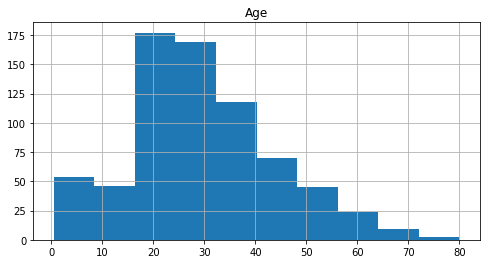

In [6]:
fig, ax = plt.subplots(figsize=(8,4))
dfTitanic.hist(column="Age", ax=ax);
print(dfTitanic["Age"].describe())

** The data is bimodal and positively skewed. There were few old (>60yrs) passengers, and more families brought children ages 1 through 8 than brought children 8 through 17. Finally, most passengers were ages 20 through 40. **

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [7]:
dfTiFeSurvived = dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Survived"] == 1)]
dfTiFeDied = dfTitanic.loc[(dfTitanic["Sex"] == "female") & (dfTitanic["Survived"] == 0)]
print("Survived Female Mean Age: {0:2.2f} \t Median Age: {1:2.2f}\nDied Female Mean Age: {2:2.2f} \t Median Age: {3:2.2f}".format(dfTiFeSurvived["Age"].mean(), dfTiFeSurvived["Age"].median(), dfTiFeDied["Age"].mean(), dfTiFeDied["Age"].median()))

Survived Female Mean Age: 28.85 	 Median Age: 28.00
Died Female Mean Age: 25.05 	 Median Age: 24.50


**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

### Problem 5
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [8]:
dfBabyDirt = pd.read_csv('http://www.stat.berkeley.edu/~statlabs/data/babies.data', delim_whitespace=True)


**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristic.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [9]:
dfBabies = dfBabyDirt[(dfBabyDirt["bwt"] != 999) & (dfBabyDirt["gestation"] != 999) & (dfBabyDirt["parity"] != 9) & (dfBabyDirt["height"] != 99) & (dfBabyDirt["weight"] != 999) & (dfBabyDirt["smoke"] != 9)]

**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

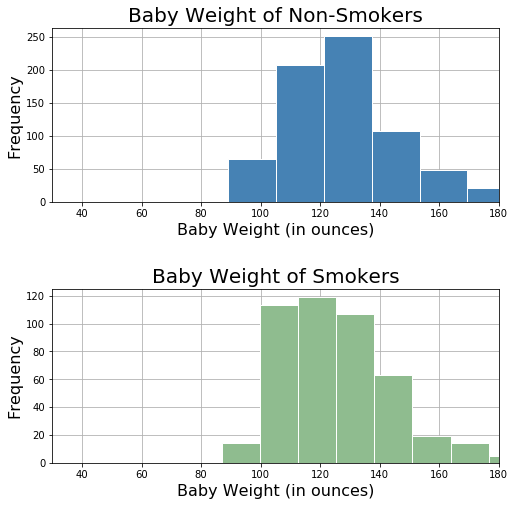

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

dfBabies.loc[dfBabies["smoke"]==0].hist(column="weight", ax=axes[0], facecolor="steelblue", edgecolor="white")                                                   
axes[0].set_title("Baby Weight of Non-Smokers", fontsize=20)
axes[0].set_xlabel("Baby Weight (in ounces)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)
axes[0].set_axisbelow(True)


dfBabies.loc[dfBabies["smoke"]==1].hist(column="weight", ax=axes[1], facecolor="darkseagreen", edgecolor="white")
axes[1].set_title("Baby Weight of Smokers", fontsize=20)
axes[1].set_xlabel("Baby Weight (in ounces)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)
axes[1].set_axisbelow(True)

# Set  axis limits to match
axes[0].set_xlim([30,180])
axes[1].set_xlim([30,180]);

fig.subplots_adjust(hspace=.5)

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

** Both distributions are unimodal and positively scewed. **

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [11]:
meanSmoke = dfBabies.loc[dfBabies["smoke"]==1]["weight"].mean()
medianSmoke = dfBabies.loc[dfBabies["smoke"]==1]["weight"].median()
meanNSmoke = dfBabies.loc[dfBabies["smoke"]==0]["weight"].mean()
medianNSmoke = dfBabies.loc[dfBabies["smoke"]==0]["weight"].median()
print("Mean Smoker: {0:2.2f} \t Median Smoker: {1:2.2f}\nMean Non-Smoker: {2:2.2f}  Median Non-Smoker: {3:2.2f}".format(meanSmoke, medianSmoke, meanNSmoke, medianNSmoke))

Mean Smoker: 126.94 	 Median Smoker: 125.00
Mean Non-Smoker: 129.48  Median Non-Smoker: 126.00


**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

### Problem 6: Cleaning Election Results Data  
***

The file 2014\_election\_results.csv contains data from congressional district races during the 2014 midterm elections.  The problem is that the data is **extremely dirty**.  Your goal in the problem will be to use Pandas to clean the election result data and then, if possible, determine the names of the winners in each congressional district as well as the vote percentage margin that they won by.  Remember that data cleaning and wrangling is a messy business.  Don't be afraid to roll your sleeves up and get hacky!   

**Part A**: Complete the clean_election_data( ) function to return a clean DataFrame that accomplishes the following: 

- remove rows in the DataFrame that are missing values in columns **STATE**, **D**, and/or **GENERAL PERCENT**

<p> </p> 

- replace unknown names in **CANDIDATE NAME** with:  
    - the value from **CANDIDATE NAME (Last)**, if available
    - the string "UNKNOWN" if impossible to determine the full or last name 
    - **Note**: besides "NaN", data collectors appear to have used the string "Scattered" to indicate missing names as well
<p> </p> 
- convert the strings in **GENERAL PERCENT** to values of type float between $0$ and $100$ 
<p> </p> 
- restrict the DataFrame to only the columns **STATE**, **D**, **CANDIDATE NAME**, **GENERAL PERCENT**

In [113]:
def clean_election_data():
    '''
    Function to clean election data 
    '''
    import math
        
    # read in dirty data 
    df = pd.read_csv("2014_election_results.csv")
    dfClean = df.dropna(subset=["STATE", "D", "GENERAL PERCENT"]).copy()

    for i in range(len(dfClean)):
        row = dfClean.iloc[i]  
        row["GENERAL PERCENT"] = np.float(row["GENERAL PERCENT"].strip("%").replace(",", "."))
        if(pd.isnull(row["CANDIDATE NAME"]) or (row["CANDIDATE NAME"] == 'Scattered')):
            if(pd.isnull(row["CANDIDATE NAME (Last)"]) or (row["CANDIDATE NAME (Last)"] == 'Scattered')):
                row["CANDIDATE NAME"] = "UNKNOWN" 
            else:
                row["CANDIDATE NAME"] = row["CANDIDATE NAME (Last)"]
    
    dfClean = dfClean[["STATE", "D", "CANDIDATE NAME", "GENERAL PERCENT"]]
    return dfClean

**Part B**: Complete the function winners_and_margins( ) that takes in your clean DataFrame from **Part A** and returns a DataFrame with one row per state-district pair and with columns **STATE**, **D**, **WINNER**, and **MARGIN** where

- **STATE** and **D** are as defined in the original DataFrame 
<p> </p> 
- **WINNER** is the name of the candidate that had the largest general vote percentage (which may possibly be "UNKNOWN")
<p> </p> 
- **MARGIN** is the difference between the winning general vote percentage and the second highest vote percentage.  If there is only one candidate in a particular district you should list the general vote percentage obtained by the sole candidate. 

<p> </p> 

Finally, your DataFrame should be **sorted from most contentious races to least contentious** (i.e. from smallest winning margin to the largest). 

In [13]:
def winners_and_margins(df):
    
    dfNew; 
    
    return dfWinners

### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_, authors Darrell Huff and Irving Geis describe some common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. **If you come up with something that you're proud of then please post it to Piazza!**